In [112]:
import pyintersection as pyi
import numpy as np
import matplotlib.pyplot as plt

In [5]:
L = 100
W = 50
kx = 31
ky = 31
def make_xyz(n, D=0):
    n = n / np.linalg.norm(n)
    x, y = np.mgrid[-L:L:kx*1j, -W:W:ky*1j]
    A, B, C = n
    z = -(A*x+B*y+D)/C
    return (x, y, z)

def make_tnxyz_flatten(n, D=0):
    n = n / np.linalg.norm(n)
    x, y = np.mgrid[-L:L:kx*1j, -W:W:ky*1j]
    A, B, C = n
    z = -(A*x+B*y+D)/C
    size = z.shape[0] * z.shape[1]
    pack = zip(range(size), range(size), x.flatten(), y.flatten(), z.flatten())
    return np.array([np.array([t0, n0, x0, y0, z0]) for t0, n0, x0, y0, z0 in pack])

In [6]:
n1 = np.array([1, 1, 1])
n2 = np.array([1, 0, 1])
apoints = make_tnxyz_flatten(n1)
bpoints = make_tnxyz_flatten(n2)
ax, ay, az = make_xyz(n1)
bx, by, bz = make_xyz(n2)
cubes, points = pyi.intersect3d(apoints, bpoints, 0.5)
ix, iy, iz = points[:, 4:5], points[:, 5:6], points[:, 6:7]

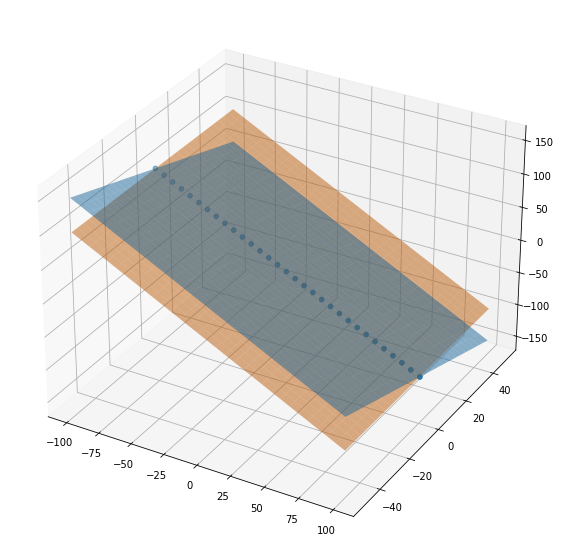

In [7]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.plot_surface(ax, ay, az, alpha=0.5)
axis.plot_surface(bx, by, bz, alpha=0.5)
axis.scatter(ix, iy, iz)


In [113]:
a6d = np.array([
    [3, 3, 1, 1, 0.9, 3, 3, 3],
    [3, 3, 1, 1, 0.5, 3.1, 2.9, 3],
    [3, 3, 1, 1, 2.1, 3, 3, 3],
    [3, 3, 1, 1, 1.9, 3.1, 3, 2.8],
    [3, 3, 1, 1, 1.1, 3.1, 3, 2.8],
    [3, 3, 1, 1, 0.8, 3.1, 3, 2.8],
    [3, 3, 1, 1, 1.5, 3.1, 3, 2.8],
    [3, 3, 1, 4, 3.1, 3.1, 2.9, 3],
    [3, 3, 0.1, 0.4, 0.7, 3.1, 2.9, 3],
    [3, 3, 6.7, 6.7, 5.1, 2.7, 3.3, 3.5],
    [3, 3, 7, 7, 5, 2.9, 3, 3.1],
    [3, 3, 6.7, 6.7, 5, 2.7, 3.1, 3.5],
    [3, 3, 6.7, 7, 5, 2.9, 3.3, 3.6],
    [3, 3, 1, 1, 0.2, 2.7, 3.3, 3.5]
])

b6d = np.array([
    [3, 3, 1, 1, 0.9, 3, 3, 3],
    [3, 3, 1, 4, 3, 3.1, 2.8, 3],
    [3, 3, 7, 7, 5, 3.1, 2.8, 3.1],
    [3, 3, 6.7, 6.8, 5, 2.7, 3.1, 3.5]  
])

In [343]:
cubes, points = pyi.intersect6d(a6d, b6d, 0.5)
points[0]
# cid, x_down, x_up, y_down, y_up, z_down, z_up
# cid, man, n, t, x_down, x_up, y_down, y_up, z_down, z_up

cubes, points

(array([[0.     , 0.9625 , 1.39375, 0.8125 , 1.225  , 0.8125 , 1.11875,
         3.     , 3.025  , 3.     , 3.     , 2.95   , 3.     ],
        [1.     , 6.56875, 7.     , 6.5875 , 7.     , 4.79375, 5.1    ,
         2.7    , 2.8    , 3.05   , 3.175  , 3.475  , 3.6    ]]),
 array([[0. , 0. , 3. , 3. , 1. , 1. , 0.9, 3. , 3. , 3. ],
        [0. , 1. , 3. , 3. , 1. , 1. , 0.9, 3. , 3. , 3. ],
        [1. , 0. , 3. , 3. , 6.7, 6.7, 5. , 2.7, 3.1, 3.5],
        [1. , 1. , 3. , 3. , 6.7, 6.8, 5. , 2.7, 3.1, 3.5]]))

In [348]:
def cube_has_point(cube, point):
    c = cube[1:]
    p = point[4:]
    if cube[0] != point[0]:
        return False
    for i in range(6):
        if c[2*i] > p[i] or p[i] > c[2*i+1]:
            return False
    return True

def rpoints_are_equal(p1, p2):
    return np.all(p1 == p2)

def rmpoints_equal(rpoint, mpoint):
    return np.all(rpoint[2:] == mpoint)

# Куб содержит хотя бы по одной точке из каждого многообразия
def cube_has_both_points(cube, points):
    m0, m1 = False, False
    for point in points:
        if cube_has_point(cube, point):
            if not m0 and point[1] == 0:
                m0 = True
            if not m1 and point[1] == 1:
                m1 = True
    return m0 and m1

# Каждая точка попала хотя бы в один из кубов (Причем cid куба и cid точки совпадают)
# Каждая точка попала лишь в один куб (Причем cid куба и cid точки совпадают)
def point_is_in_only_one_cubes(cubes, point):
    num = 0
    for cube in cubes:
        if cube_has_point(cube, point):
            num += 1
    return num == 1


def point_in_true_manifold(rpoint, mans):
    if rpoint[1] == 0:
        man = mans[0]
    elif rpoint[1] == 1:
        man = mans[1]
    else:
        return False
    for mpoint in man:
        if point_equal(rpoint, mpoint):
            return True
    return False


def points_in_true_manifolds


cube_has_both_points(cubes[0], points)
point_is_in_cubes(cubes, points[0])
point_in_true_manifold(points[0], (a6d, b6d))

True